In [54]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [55]:
main_dir = ""  # Specify your main directory containing the dataset

# Parameters
img_size = (256, 256)  # Resize images
batch_size = 32  # Batch size for data generators

# Create ImageDataGenerator instances for training and testing
datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.4)  # 40% for validation
datagen_test = ImageDataGenerator(rescale=1./255)  # No validation split for test data

# Prepare training dataset
train_generator = datagen_train.flow_from_directory(
    os.path.join(main_dir, "train"),  # Adjust your directory path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Prepare validation dataset
validation_generator = datagen_train.flow_from_directory(
    os.path.join(main_dir, "train"),  # Adjust your directory path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Prepare test dataset
test_generator = datagen_test.flow_from_directory(
    os.path.join(main_dir, "test"),  # Adjust your directory path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
classnames = list(train_generator.class_indices.keys())
num_classes = len(classnames)

Found 368 images belonging to 184 classes.
Found 184 images belonging to 184 classes.


KeyboardInterrupt: 

In [51]:
def h_f(img1):
    feature_ = []
    for img in img1:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=False)
        feature_.append(features)
    return np.array(features)

In [52]:
def s_f(images):
    sift = cv2.SIFT_create()
    sift_features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        if img_gray.size == 0:  # Check if the image is empty
            print("Warning: Empty image encountered.")
            sift_features.append(np.zeros(128))  # Append a zero array if the image is empty
            continue
        
        # Ensure the image is in the correct depth
        if img_gray.dtype != np.uint8:
            img_gray = img_gray.astype(np.uint8)  # Convert to uint8 if necessary
        
        keypoints, descriptors = sift.detectAndCompute(img_gray, None)
        sift_features.append(descriptors.flatten() if descriptors is not None else np.zeros(128))  # Pad with zeros if no features
    return np.array(sift_features)

In [53]:
train_images = []
train_labels = []
for i in range(len(train_generator)):
    x_batch, y_batch = train_generator[i]
    train_images.extend(x_batch)
    train_labels.extend(y_batch)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Extract features using HOG and SIFT
X_train_hog = h_f(train_images)
X_train_sift = s_f(train_images)

# Prepare labels for training (one-hot encode)
y_train = to_categorical(np.argmax(train_labels, axis=1), num_classes=num_classes)

KeyboardInterrupt: 

Found 368 images belonging to 184 classes.
Found 184 images belonging to 184 classes.
Found 184 images belonging to 184 classes.
Shape of X_train: (294, 34596)
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 9.3409e-04 - loss: 7.9823 - val_accuracy: 0.0000e+00 - val_loss: 6.8194
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.1602 - loss: 6.1464 - val_accuracy: 0.0000e+00 - val_loss: 6.7940
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.3018 - loss: 5.2086 - val_accuracy: 0.0135 - val_loss: 6.9850
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6997 - loss: 4.2495 - val_accuracy: 0.0135 - val_loss: 7.4024
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8960 - loss: 3.4858 - val_accuracy: 0.0135 - val_loss: 7.9962
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9465 - loss: 2.9900 - val_accuracy: 0.0270 - val_loss: 8.0172
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accura

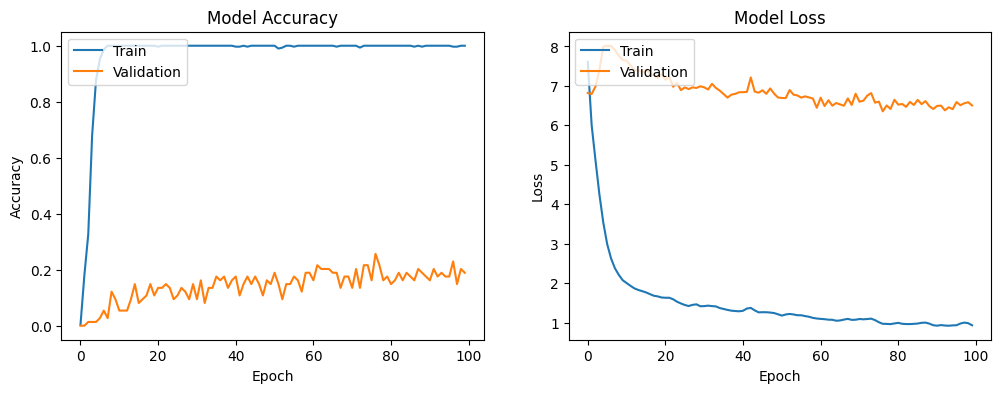

Shape of X_train: (294, 128)
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 7.2557 - val_accuracy: 0.0000e+00 - val_loss: 6.9796
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0058 - loss: 6.8967 - val_accuracy: 0.0000e+00 - val_loss: 6.6648
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0034 - loss: 6.5894 - val_accuracy: 0.0000e+00 - val_loss: 6.3995
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0121 - loss: 6.3310 - val_accuracy: 0.0000e+00 - val_loss: 6.1792
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0130 - loss: 6.1162 - val_accuracy: 0.0000e+00 - val_loss: 5.9979
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0067 - loss: 5.9383 - val_accuracy: 0.0000e+00 - val_loss: 5.8498
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0013 - loss: 5.7937 - val_accuracy: 0.0000e+00 - val_loss: 5.7294
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

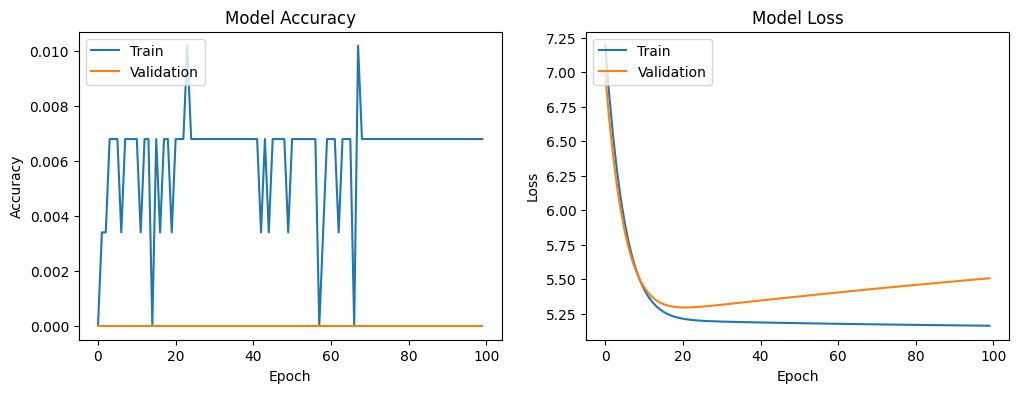

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3889 - loss: 4.1256 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0016 - loss: 5.2299     
HOG Model Accuracy: 0.3804347813129425
SIFT Model Accuracy: 0.005434782709926367


In [57]:
main_dir = ""  # Specify your main directory containing the dataset

# Parameters
img_size = (256, 256)  # Resize images
batch_size = 32  # Batch size for data generators
l2_reg = 0.01  # L2 regularization strength

# Create ImageDataGenerator instances for training and testing
datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.4)  # 40% for validation
datagen_test = ImageDataGenerator(rescale=1./255)  # No validation split for test data

# Prepare training dataset
train_generator = datagen_train.flow_from_directory(
    os.path.join(main_dir, "train"),  # Adjust your directory path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Prepare validation dataset
validation_generator = datagen_train.flow_from_directory(
    os.path.join(main_dir, "train"),  # Adjust your directory path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Prepare test dataset
test_generator = datagen_test.flow_from_directory(
    os.path.join(main_dir, "test"),  # Adjust your directory path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

classnames = list(train_generator.class_indices.keys())
num_classes = len(classnames)

def h_f(imgs):
    feature_ = []
    for img in imgs:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=False)
        feature_.append(features)
    return np.array(feature_)

def s_f(images):
    sift = cv2.SIFT_create()
    sift_features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        if img_gray.size == 0:  # Check if the image is empty
            print("Warning: Empty image encountered.")
            sift_features.append(np.zeros(128))  # Append a zero array if the image is empty
            continue
        
        # Ensure the image is in the correct depth
        if img_gray.dtype != np.uint8:
            img_gray = img_gray.astype(np.uint8)  # Convert to uint8 if necessary
        
        keypoints, descriptors = sift.detectAndCompute(img_gray, None)
        sift_features.append(descriptors.flatten() if descriptors is not None else np.zeros(128))  # Pad with zeros if no features
    return np.array(sift_features)

train_images = []
train_labels = []
for i in range(len(train_generator)):
    x_batch, y_batch = train_generator[i]
    train_images.extend(x_batch)
    train_labels.extend(y_batch)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Extract features using HOG and SIFT
X_train_hog = h_f(train_images)
X_train_sift = s_f(train_images)

# Prepare labels for training (one-hot encode)
y_train = to_categorical(np.argmax(train_labels, axis=1), num_classes=num_classes)

def train_ann(X_train, y_train, X_val=None, y_val=None):
    model = Sequential()
    
    # Ensure X_train is 2D (num_samples, num_features)
    if len(X_train.shape) == 2:  # Already 2D
        print(f"Shape of X_train: {X_train.shape}")  # Should be (num_samples, num_features)
    else:
        raise ValueError("X_train should be 2D.")

    # Add L2 regularization to the layers
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_reg), input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes accordingly

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Include validation data if provided
    if X_val is not None and y_val is not None:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))  # Adjust as needed
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust as needed

    plot_training_history(history)  # Call your plotting function here
    return model

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Split your training data for validation
X_train_hog, X_val_hog, y_train_hog, y_val_hog = train_test_split(X_train_hog, y_train, test_size=0.2, random_state=42)
X_train_sift, X_val_sift, y_train_sift, y_val_sift = train_test_split(X_train_sift, y_train, test_size=0.2, random_state=42)

# Train ANN on HOG features with validation
model_hog = train_ann(X_train_hog, y_train_hog, X_val_hog, y_val_hog)

# Train ANN on SIFT features with validation
model_sift = train_ann(X_train_sift, y_train_sift, X_val_sift, y_val_sift)

# Load and evaluate test images
test_images = []
test_labels = []
for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    test_images.extend(x_batch)
    test_labels.extend(y_batch)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Extract features from test images
X_test_hog = h_f(test_images)
X_test_sift = s_f(test_images)

# Prepare labels for testing (one-hot encode)
y_test = to_categorical(np.argmax(test_labels, axis=1), num_classes=num_classes)

# Evaluate models on test data
hog_accuracy = model_hog.evaluate(X_test_hog, y_test)
sift_accuracy = model_sift.evaluate(X_test_sift, y_test)

print("HOG Model Accuracy:", hog_accuracy[1])
print("SIFT Model Accuracy:", sift_accuracy[1])


In [60]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Initialize lists for summary
    summary_data = []
    total_tp = 0
    total_fp = 0
    total_fn = 0

    for i in range(len(cm)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (FP + FN + TP)

        # Calculate Precision and Recall
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        summary_data.append({
            'Class': i, 
            'TP': TP, 
            'TN': TN, 
            'FP': FP, 
            'FN': FN,
            'Precision': precision,
            'Recall': recall
        })

        total_tp += TP
        total_fp += FP
        total_fn += FN

    summary_df = pd.DataFrame(summary_data)

    # Calculate overall Precision and Recall
    overall_precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
    overall_recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

    print("\nSummarized Confusion Matrix:")
    print(summary_df)

    print(f"\nOverall Precision: {overall_precision:.4f}")
    print(f"Overall Recall: {overall_recall:.4f}")

# Evaluate models on test data
print("Evaluating HOG model:")
evaluate_model(model_hog, X_test_hog, y_test)

print("\nEvaluating SIFT model:")
evaluate_model(model_sift, X_test_sift, y_test)

Evaluating HOG model:
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Summarized Confusion Matrix:
     Class  TP   TN  FP  FN  Precision  Recall
0        0   1  183   0   0        1.0     1.0
1        1   1  182   1   0        0.5     1.0
2        2   1  182   1   0        0.5     1.0
3        3   0  183   0   1        0.0     0.0
4        4   0  183   0   1        0.0     0.0
..     ...  ..  ...  ..  ..        ...     ...
179    179   0  183   0   1        0.0     0.0
180    180   1  182   1   0        0.5     1.0
181    181   0  183   0   1        0.0     0.0
182    182   1  183   0   0        1.0     1.0
183    183   0  183   0   1        0.0     0.0

[184 rows x 7 columns]

Overall Precision: 0.3804
Overall Recall: 0.3804

Evaluating SIFT model:
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Summarized Confusion Matrix:
     Class  TP   TN  FP  FN  Precision  Recall
0        0   0  183   0   1        0.0     0.0
1        1   0  183   0   1        0.0     0.0
2        2   0  183   0   1        0.0 